In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,AveragePooling2D,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [3]:
IMAGE_SIZE = [224, 224]
train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [4]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
x = inception.output
x = GlobalAveragePooling2D()(x)

In [6]:
x = Dense(512, activation='relu')(x)

In [7]:
folders = glob('Datasets/train/*')
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
model = Model(inputs=inception.input, outputs=prediction)

In [9]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [10]:
for layer in inception.layers:
    layer.trainable = False

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3250 images belonging to 33 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 330 images belonging to 33 classes.


In [14]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
102/102 [==============================] - 229s 2s/step - loss: 1.6975 - accuracy: 0.5209 - val_loss: 1.1549 - val_accuracy: 0.6848
Epoch 2/20
102/102 [==============================] - 225s 2s/step - loss: 0.8036 - accuracy: 0.7557 - val_loss: 0.8587 - val_accuracy: 0.7455
Epoch 3/20
102/102 [==============================] - 227s 2s/step - loss: 0.6069 - accuracy: 0.8092 - val_loss: 0.6971 - val_accuracy: 0.8000
Epoch 4/20
102/102 [==============================] - 226s 2s/step - loss: 0.5066 - accuracy: 0.8354 - val_loss: 0.7557 - val_accuracy: 0.7485
Epoch 5/20
102/102 [==============================] - 225s 2s/step - loss: 0.4583 - accuracy: 0.8498 - val_loss: 0.6582 - val_accuracy: 0.8091
Epoch 6/20
102/102 [==============================] - 224s 2s/step - loss: 0.3879 - accuracy: 0.8717 - val_loss: 0.7159 - val_accuracy: 0.7879
Epoch 7/20
102/102 [==============================] - 226s 2s/step

In [16]:
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
102/102 [==============================] - 155s 2s/step - loss: 0.1508 - accuracy: 0.9532 - val_loss: 0.7274 - val_accuracy: 0.8273
Epoch 2/30
102/102 [==============================] - 159s 2s/step - loss: 0.1261 - accuracy: 0.9566 - val_loss: 0.5714 - val_accuracy: 0.8455
Epoch 3/30
102/102 [==============================] - 159s 2s/step - loss: 0.1160 - accuracy: 0.9612 - val_loss: 0.4981 - val_accuracy: 0.8576
Epoch 4/30
102/102 [==============================] - 159s 2s/step - loss: 0.1051 - accuracy: 0.9646 - val_loss: 0.4876 - val_accuracy: 0.8576
Epoch 5/30
102/102 [==============================] - 161s 2s/step - loss: 0.0987 - accuracy: 0.9649 - val_loss: 0.6084 - val_accuracy: 0.8424
Epoch 6/30
102/102 [==============================] - 159s 2s/step - loss: 0.0911 - accuracy: 0.9695 - val_loss: 0.5533 - val_accuracy: 0.8606
Epoch 7/30
102/102 [==============================] - 159s 2s/step - loss: 0.0822 - accuracy: 0.9698 - val_loss: 0.5784 - val_accuracy: 0.8606

In [18]:
import matplotlib.pyplot as plt

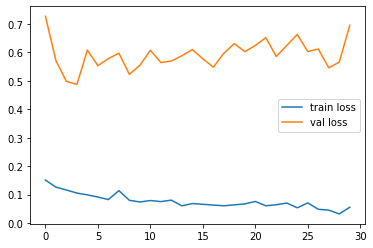

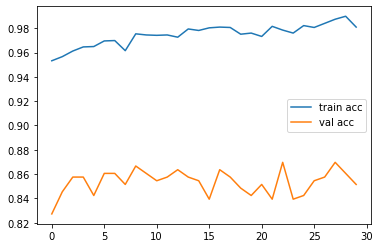

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
from tensorflow.keras.models import load_model
model.save('model_inception.h5')

In [21]:
y_pred = model.predict(test_set)

In [22]:
y_pred

array([[3.1487588e-07, 1.2837344e-07, 2.8002925e-10, ..., 3.1691837e-11,
        2.6265204e-10, 1.2654709e-11],
       [6.2359317e-04, 9.9693667e-09, 7.8924415e-08, ..., 4.0383685e-15,
        5.4832424e-13, 5.1089389e-12],
       [1.6944258e-08, 2.9787444e-07, 4.5481056e-13, ..., 1.5122686e-11,
        1.3242946e-12, 1.2493069e-13],
       ...,
       [6.4041200e-14, 3.4530572e-14, 9.6557042e-12, ..., 8.4428878e-13,
        3.5133839e-16, 6.4028007e-14],
       [3.0342122e-09, 2.3474989e-09, 6.1783282e-07, ..., 2.0397691e-08,
        5.5775704e-06, 2.7717661e-12],
       [3.9949402e-10, 1.3630050e-07, 4.6892473e-11, ..., 8.8147301e-13,
        4.2550583e-10, 1.7238549e-14]], dtype=float32)

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([ 4,  3, 12,  8,  7, 23, 30,  8, 14, 22,  2, 23,  6, 25,  4, 10, 30,
       23, 17, 17, 26, 24, 26,  7, 20, 30, 21, 15, 27, 31, 25, 11, 17,  9,
       16, 24, 32, 22, 18,  7,  1,  8,  4, 20, 20, 25, 16,  7, 27, 32, 30,
        9, 18, 19, 24, 15,  3, 13, 24,  6, 20, 22, 27, 16, 15, 16, 15,  3,
       13, 19, 15, 11,  3, 16, 18,  2, 12, 24, 18, 19, 28, 14,  6, 13, 30,
       20, 18,  8, 17, 28,  5,  2,  0,  3, 22, 12, 21,  0, 17,  1, 32,  0,
       24, 12,  2, 24, 12, 11,  1,  5, 17,  8,  2,  3, 29,  6, 25, 18, 10,
       21,  1,  9, 24, 15,  4, 22,  8, 26,  6, 18, 14, 18, 24, 27, 23, 16,
       21, 19, 17,  5, 14, 26, 12, 20,  7, 13, 16, 23,  2, 27,  1, 13, 22,
       31, 28, 29, 10,  1, 29,  2, 30, 20,  3, 19, 22, 14,  9, 25, 19, 24,
       17, 30,  6, 28, 28, 17, 24,  6,  2, 24, 21, 10, 15, 26, 31, 19,  3,
       14, 30, 32,  5, 30, 30,  7,  2, 17,  0, 32, 27,  9, 18, 23,  9, 31,
        8, 24,  7,  0, 13,  7, 25, 23, 24, 31, 24, 14,  8,  4, 32, 31, 11,
        8,  3, 21,  6,  8